# Initial Data Processing for Dr.KM data #

In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv("/Users/benchen/NeuralHub/young_cohort_execution_df.csv")
print(df.head())

  Mouse  Age_Groups  Trial  blockTrial  0_ITI  0_trialDuration  Decision  \
0  YC1N           0      4           4  1.709            0.343         0   
1  YC1N           0      5           5  1.554            0.647         0   
2  YC1N           0      6           6  5.535            0.540         1   
3  YC1N           0      7           7  5.602            0.474         0   
4  YC1N           0      8           8  1.847            0.263         0   

   1_Port  1_Reward  1_ITI  ...  Trial_based  Fibers  Dreadds_During_Training  \
0       0         1  2.532  ...            1       1                        0   
1       0         0  1.709  ...            1       1                        0   
2       0         0  1.554  ...            1       1                        0   
3       1         1  5.535  ...            1       1                        0   
4       0         1  5.602  ...            1       1                        0   

   Viral_expression  Genotype  Date_of_Surgery        Da

In [3]:
import matplotlib.pyplot as plt

<function matplotlib.pyplot.show(close=None, block=None)>

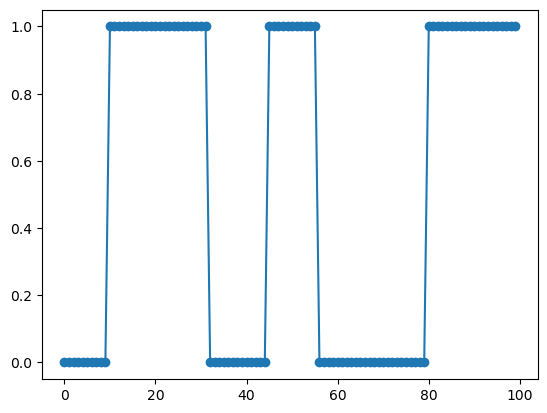

In [4]:
data100 = df.Target[0:100]
plt.plot(data100, marker = "o")
plt.show
# 0 is left, 1 is right
#task

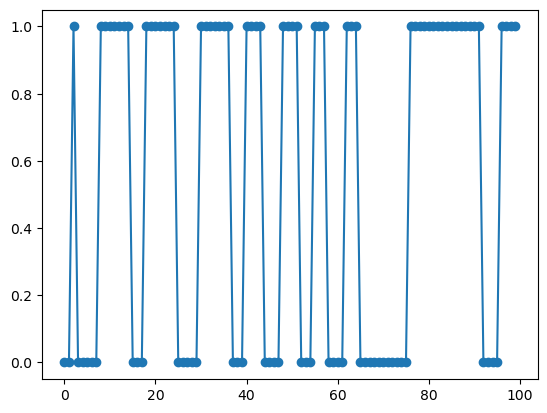

In [5]:
data100dec = df.Decision[0:100]
plt.plot(data100dec,marker = "o")

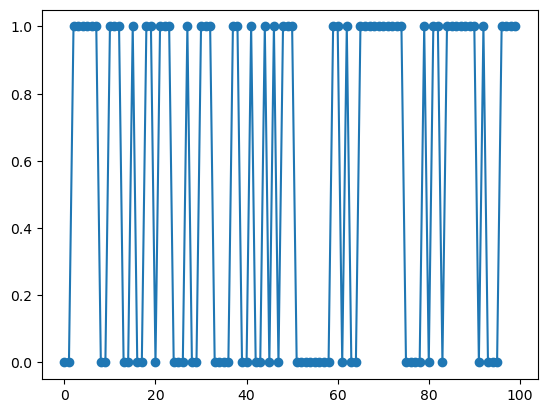

In [6]:
data100rew = df.Reward[0:100]
plt.plot(data100rew, marker = "o")
# 0 means no reward, 1 means rewarded for the specific mouse choice in that trial

**Tasks for June 8th**<br>
#trial per session an animal does for a session<br>
#Amount of switching per session<br>

#Predicting reward through past experience with reward and no-reward<br>
#How diffent mouse perform, how age impacts this perform<br>

#Read paper to imitate their data processing methods<br>

In [7]:
print(df["Session_Number"].unique())
len(df)

[ 5  6  7  8  9 10]


90644

In [8]:
#List of different mouse used in this experiment
Mouse_list = df.Mouse.unique()
print(Mouse_list)
print(f"{len(Mouse_list)} different mice used")

['YC1N' 'YC1L' 'YC1R' 'YC1B' 'YC2N' 'YC2L' 'YC2R' 'YC2B' 'YC3N' 'YC3L'
 'YC3BLL' 'YC3B' 'YC4N' 'YC4L' 'YC4R' 'YC4B' 'YC5N' 'YC5L' 'YC5R' 'YC5B'
 'YC6N' 'YC6L' 'YC6R' 'YC6B' 'YC7N' 'YC7L' 'YC7R' 'YC7B' 'YC8N' 'YC8L'
 'YC8R' 'YC8B']
32 different mice used


In [ ]:
#Number of trials in each Session_Number
data_session_5 = df[(df["Session_Number"]==5)]
data_session_6 = df[df["Session_Number"]==6]
data_session_7 = df[df["Session_Number"]==7]
data_session_8 = df[df["Session_Number"]==8]
data_session_9 = df[df["Session_Number"]==9]
data_session_10 = df[df['Session_Number']==10]
print(len(data_session_5))
print(len(data_session_6))
print(len(data_session_7))
print(len(data_session_8))
print(len(data_session_9))
print(len(data_session_10))



15338
15051
14612
15297
15606
14740


In [10]:
#Number of trials in each Session_Number in Mouse Y1C1
data_session_5_YC1N = df[(df["Session_Number"]==5) & (df['Mouse'] == "YC1N")]
print(data_session_5_YC1N.head())
print(data_session_5_YC1N.tail())
print(f"{len(data_session_5_YC1N)} trials in session number 5 for mouse YC1N")


  Mouse  Age_Groups  Trial  blockTrial  0_ITI  0_trialDuration  Decision  \
0  YC1N           0      4           4  1.709            0.343         0   
1  YC1N           0      5           5  1.554            0.647         0   
2  YC1N           0      6           6  5.535            0.540         1   
3  YC1N           0      7           7  5.602            0.474         0   
4  YC1N           0      8           8  1.847            0.263         0   

   1_Port  1_Reward  1_ITI  ...  Trial_based  Fibers  Dreadds_During_Training  \
0       0         1  2.532  ...            1       1                        0   
1       0         0  1.709  ...            1       1                        0   
2       0         0  1.554  ...            1       1                        0   
3       1         1  5.535  ...            1       1                        0   
4       0         1  5.602  ...            1       1                        0   

   Viral_expression  Genotype  Date_of_Surgery        Da

In [62]:
#Number of trials in each Session_Number in Mouse Y1CL
data_session_5_YC1L = df[(df["Session_Number"]==5) & (df['Mouse'] == "YC1L")]
print(data_session_5_YC1L.head())
print(data_session_5_YC1L.tail())
print(f"{len(data_session_5_YC1L)} trials in session number 5 for mouse YC1L")

     Mouse  Age_Groups  Trial  blockTrial  0_ITI  0_trialDuration  Decision  \
3000  YC1L           0      4           4  4.801            0.382         1   
3001  YC1L           0      5           5  2.839            0.602         0   
3002  YC1L           0      6           6  2.098            0.365         1   
3003  YC1L           0      7           7  1.655            0.483         0   
3004  YC1L           0      8           8  2.101            0.352         1   

      1_Port  1_Reward  1_ITI  ...  Trial_based  Fibers  \
3000       1         1  1.252  ...            1       1   
3001       1         1  4.801  ...            1       1   
3002       0         1  2.839  ...            1       1   
3003       1         0  2.098  ...            1       1   
3004       0         0  1.655  ...            1       1   

      Dreadds_During_Training  Viral_expression  Genotype  Date_of_Surgery  \
3000                        0               NaN        WT              NaN   
3001          

In [ ]:
# Number of Switching per Session using simple for loop YC1L
switch_session_5_YC1L = []


# Print the length of the session data
print(len(data_session_5_YC1L))

for i in range(5,100):
    if data_session_5_YC1L['Decision'][i] == data_session_5_YC1L['Decision'][i - 1]:
        continue
    else:
        switch_session_5_YC1L.append(1)

# Print the length of the switch_session_1 list
print(len(switch_session_5_YC1L))

518


KeyError: 5

In [57]:
# Number of Switching per Session using simple for loop
switch_session_5_YC1N = []


# Print the length of the session data
print(len(data_session_5_YC1N))

for i in range(5,486):
    if data_session_5_YC1N['Decision'][i] == data_session_5_YC1N['Decision'][i - 1]:
        continue
    else:
        switch_session_5_YC1N.append(1)

# Print the length of the switch_session_1 list
print(len(switch_session_5_YC1N))

487
67


In [58]:
# Number of Switching per Session using for loop and zip()
switch_session_5_YC1N = []

for trial, decision in zip(data_session_5_YC1N.Trial, data_session_5_YC1N.Decision):
    if 4 < trial < 487:
        if data_session_5_YC1N['Decision'][trial] == data_session_5_YC1N['Decision'][trial-1]:
            continue
        else:
            switch_session_5_YC1N.append(1)
    elif trial == 4:
        continue
    else:
        break
#print Number of Trials in Session_Number 5
print(len(data_session_5_YC1N.Trial))

# Print the length of the switch_session_1 list
print(switch_session_5_YC1N)
print(len(switch_session_5_YC1N))


487
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
67


In [61]:
# Number of Switching per Session using for loop and zip() (YC1L)
switch_session_5_YC1L = []

for trial, decision in zip(data_session_5_YC1L.Trial, data_session_5_YC1L.Decision):
    if 5 < trial < 520:
        if data_session_5_YC1L['Decision'][trial] == data_session_5_YC1L['Decision'][trial-1]:
            continue
        else:
            switch_session_5_YC1L.append(1)
    elif trial == 4 or 5:
        continue
    else:
        break
#print Number of Trials in Session_Number 5
print(len(data_session_5_YC1L.Trial))

# Print the length of the switch_session_1 list
print(switch_session_5_YC1L)
print(len(switch_session_5_YC1L))

KeyError: 6

**zip()**
 used when the trial number is used to loop, instead of the list index,<br> which differs in number with the trial number

In [26]:
#How many sessions for each mouse

for mouse_name in df.Mouse.unique():
    mouse_df = df[df.Mouse == mouse_name]
    print(f"Mouse: {mouse_name}, Session: {mouse_df.Session_Number.unique()}")

Mouse: YC1N, Session: [ 5  6  7  8  9 10]
Mouse: YC1L, Session: [5 6 7 8 9]
Mouse: YC1R, Session: [ 5  6  7  8  9 10]
Mouse: YC1B, Session: [ 5  6  7  8  9 10]
Mouse: YC2N, Session: [ 5  6  7  8  9 10]
Mouse: YC2L, Session: [ 5  6  7  8  9 10]
Mouse: YC2R, Session: [ 5  6  7  8  9 10]
Mouse: YC2B, Session: [ 5  6  7  8  9 10]
Mouse: YC3N, Session: [ 5  6  7  8  9 10]
Mouse: YC3L, Session: [ 5  6  7  8  9 10]
Mouse: YC3BLL, Session: [ 5  6  7  8  9 10]
Mouse: YC3B, Session: [ 5  6  7  8  9 10]
Mouse: YC4N, Session: [ 5  6  7  8  9 10]
Mouse: YC4L, Session: [ 5  6  7  8  9 10]
Mouse: YC4R, Session: [ 5  6  7  8  9 10]
Mouse: YC4B, Session: [ 5  6  7  8  9 10]
Mouse: YC5N, Session: [ 5  6  7  8  9 10]
Mouse: YC5L, Session: [ 5  6  7  8  9 10]
Mouse: YC5R, Session: [5 6 7 8 9]
Mouse: YC5B, Session: [ 5  6  7  8  9 10]
Mouse: YC6N, Session: [ 5  6  7  8  9 10]
Mouse: YC6L, Session: [ 5  6  7  8  9 10]
Mouse: YC6R, Session: [5 6 7 8 9]
Mouse: YC6B, Session: [ 5  6  7  8  9 10]
Mouse: YC7N, S

In [27]:
#Dividing the dataframe into subsets, according to mouse used
data_by_mouse = {}
for mouse_name in df.Mouse.unique():
    mouse_df = df[df.Mouse == mouse_name]
    data_by_mouse[mouse_name] = mouse_df

print(data_by_mouse.keys())



dict_keys(['YC1N', 'YC1L', 'YC1R', 'YC1B', 'YC2N', 'YC2L', 'YC2R', 'YC2B', 'YC3N', 'YC3L', 'YC3BLL', 'YC3B', 'YC4N', 'YC4L', 'YC4R', 'YC4B', 'YC5N', 'YC5L', 'YC5R', 'YC5B', 'YC6N', 'YC6L', 'YC6R', 'YC6B', 'YC7N', 'YC7L', 'YC7R', 'YC7B', 'YC8N', 'YC8L', 'YC8R', 'YC8B'])


In [31]:
#Dividing each mouse's dataframe into sessions using nested dictionary

data_by_mouse_and_session = {}

for mouse in data_by_mouse.keys():
    mouse_df = data_by_mouse[mouse]
    data_by_mouse_and_session[mouse] = {}
    for session_number in mouse_df["Session_Number"].unique():
        session_df = mouse_df[mouse_df.Session_Number == session_number]
        data_by_mouse_and_session[mouse][session_number] = session_df

print(data_by_mouse_and_session['YC1N'][10])


     Mouse  Age_Groups  Trial  blockTrial  0_ITI  0_trialDuration  Decision  \
2455  YC1N           0      4           4  7.934            0.377         0   
2456  YC1N           0      5           5  1.302            0.252         0   
2457  YC1N           0      6           6  1.147            0.310         1   
2458  YC1N           0      7           7  1.288            0.301         1   
2459  YC1N           0      8           8  1.080            0.426         1   
...    ...         ...    ...         ...    ...              ...       ...   
2995  YC1N           0    544           2  2.205            0.357         1   
2996  YC1N           0    545           3  7.922            1.118         0   
2997  YC1N           0    546           4  3.106            0.353         0   
2998  YC1N           0    547           5  1.384            0.374         0   
2999  YC1N           0    548           6  3.469            0.556         0   

      1_Port  1_Reward  1_ITI  ...  Trial_based  Fi

In [63]:
#Switching behavior by mouse and session number
switching_by_mouse_and_session = {}
first = True 

for mouse in data_by_mouse.keys():
    mouse_df = data_by_mouse[mouse]
    data_by_mouse_and_session[mouse] = {}
    switching_by_mouse_and_session[mouse] = {}

    for session_number in mouse_df["Session_Number"].unique():
        session_df = mouse_df[mouse_df.Session_Number == session_number]
        data_by_mouse_and_session[mouse][session_number] = session_df
        switching_num = []
        first = True 
        switching_by_mouse_and_session[mouse][session_number] = {}

        for i in range(1,len(session_df["Decision"])):

            #if first:
            #    first = False
            #    continue
            #else:
            #    if session_df["Decision"][i] == session_df["Decision"][i - 1]:
            #        continue
            #    else:
            #        switching_num.append(1)

            if session_df["Decision"].iloc[i] != session_df["Decision"].iloc[i - 1]:
                switching_num.append(1)
        

        
        switching_by_mouse_and_session[mouse][session_number] = len(switching_num)

    for session_number in mouse_df["Session_Number"].unique():
        print(f"Mouse:{mouse}, Session:{session_number} Switching:{switching_by_mouse_and_session[mouse][session_number]}")






Mouse:YC1N, Session:5 Switching:69
Mouse:YC1N, Session:6 Switching:49
Mouse:YC1N, Session:7 Switching:62
Mouse:YC1N, Session:8 Switching:53
Mouse:YC1N, Session:9 Switching:46
Mouse:YC1N, Session:10 Switching:46
Mouse:YC1L, Session:5 Switching:72
Mouse:YC1L, Session:6 Switching:72
Mouse:YC1L, Session:7 Switching:54
Mouse:YC1L, Session:8 Switching:53
Mouse:YC1L, Session:9 Switching:48
Mouse:YC1R, Session:5 Switching:96
Mouse:YC1R, Session:6 Switching:78
Mouse:YC1R, Session:7 Switching:81
Mouse:YC1R, Session:8 Switching:73
Mouse:YC1R, Session:9 Switching:82
Mouse:YC1R, Session:10 Switching:71
Mouse:YC1B, Session:5 Switching:103
Mouse:YC1B, Session:6 Switching:89
Mouse:YC1B, Session:7 Switching:68
Mouse:YC1B, Session:8 Switching:69
Mouse:YC1B, Session:9 Switching:72
Mouse:YC1B, Session:10 Switching:81
Mouse:YC2N, Session:5 Switching:49
Mouse:YC2N, Session:6 Switching:63
Mouse:YC2N, Session:7 Switching:45
Mouse:YC2N, Session:8 Switching:50
Mouse:YC2N, Session:9 Switching:40
Mouse:YC2N, Sess

/var/folders/nn/5m7xhsdj28g92vn5kdvwz0680000gn/T/ipykernel_40460/3872116807.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


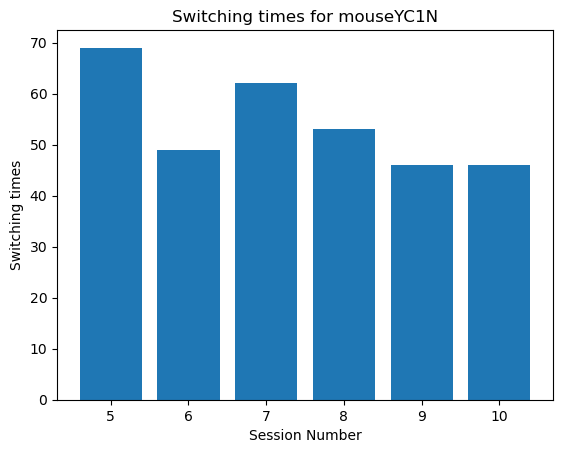

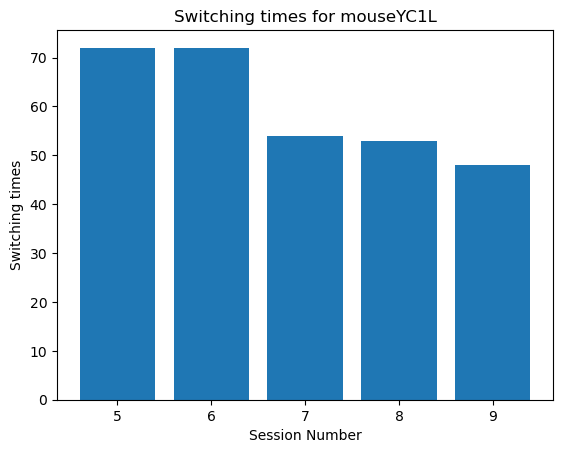

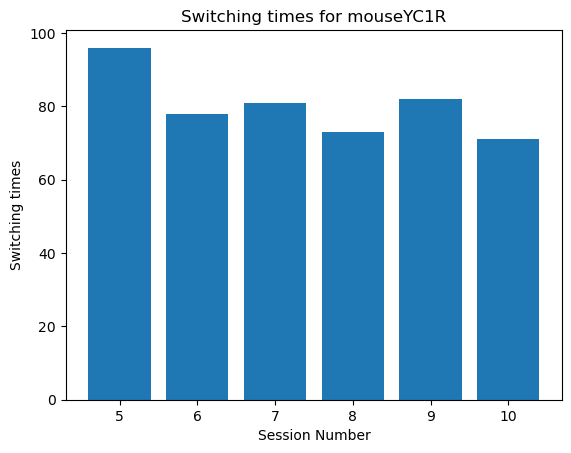

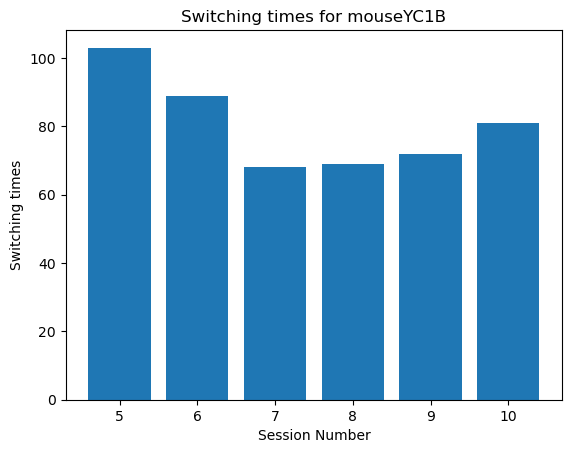

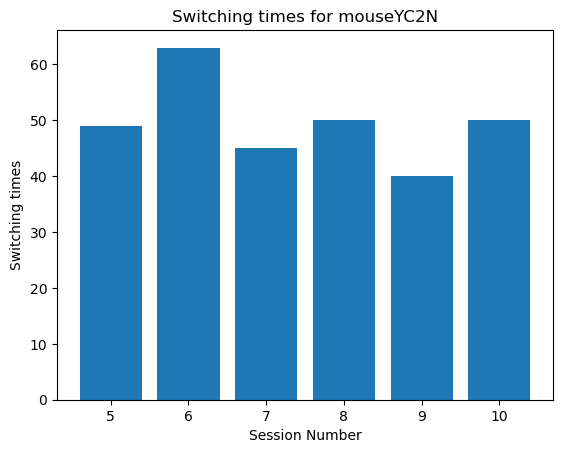

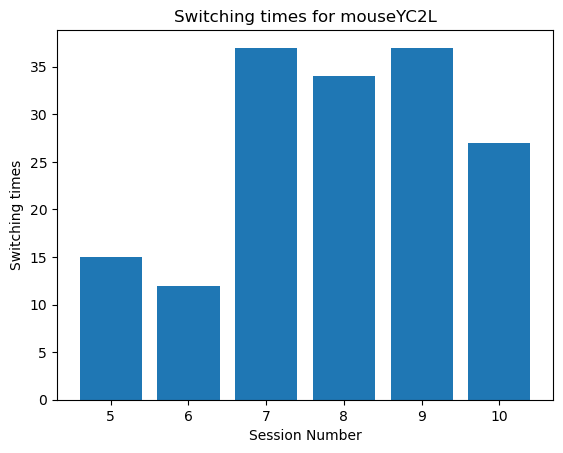

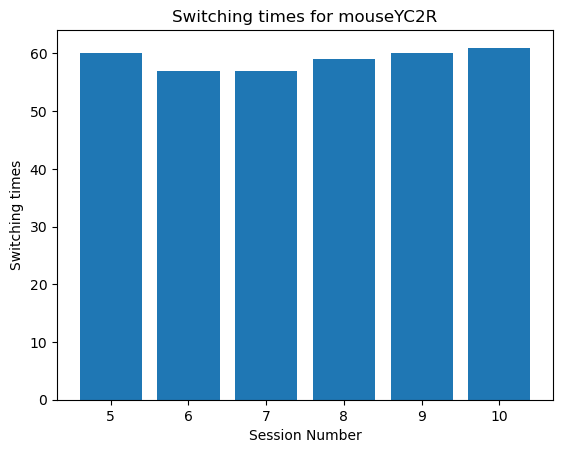

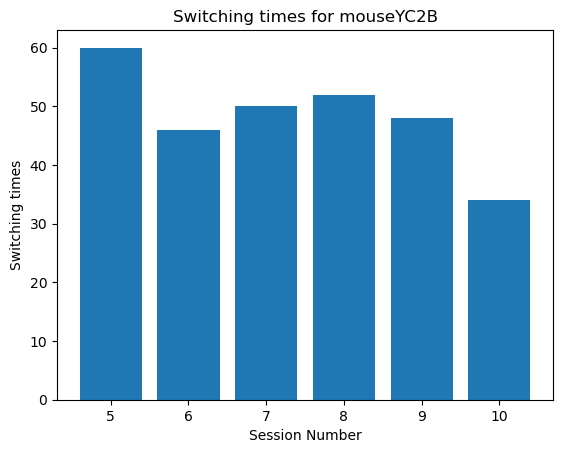

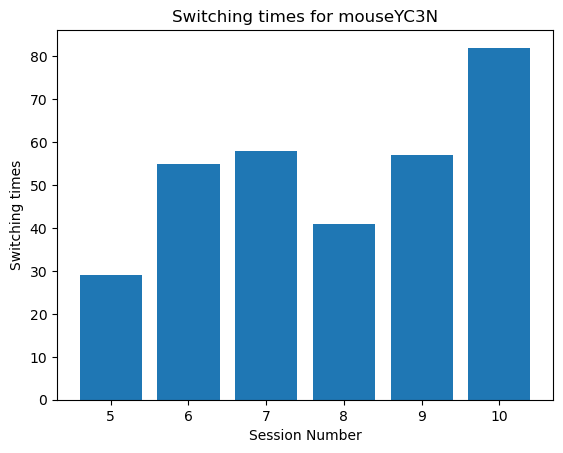

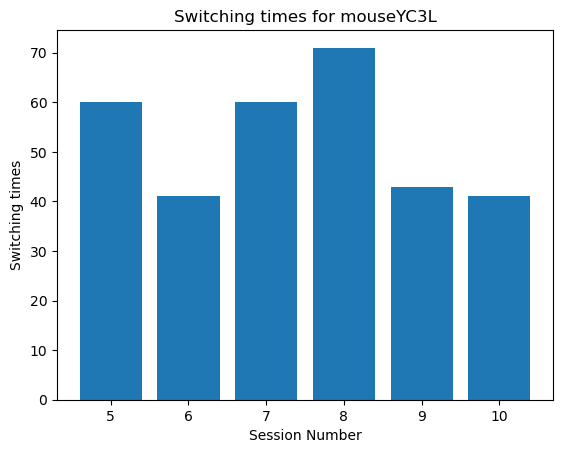

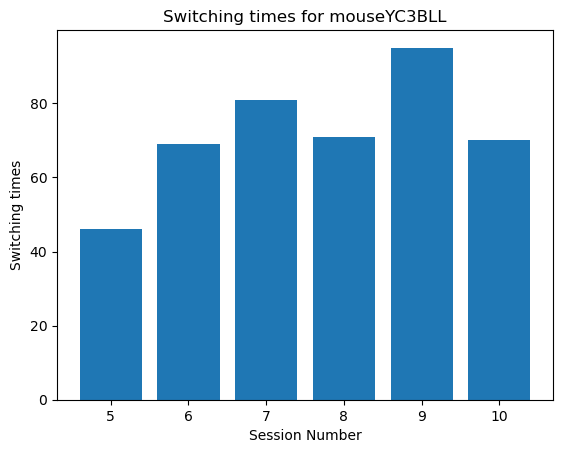

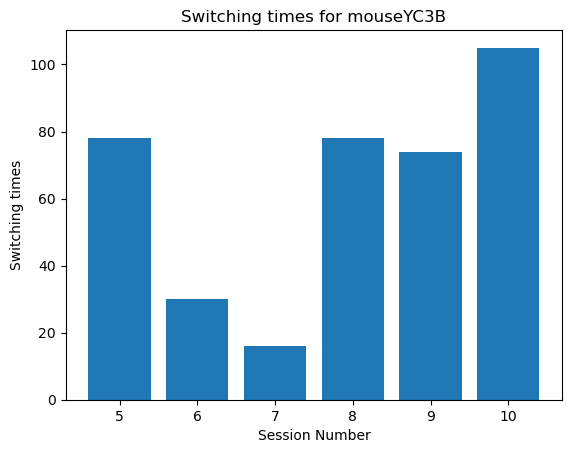

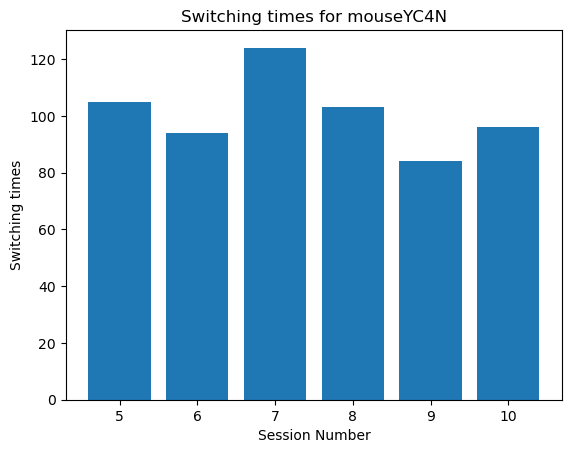

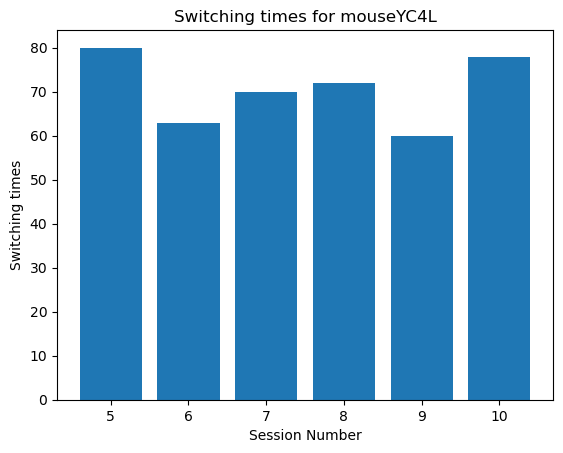

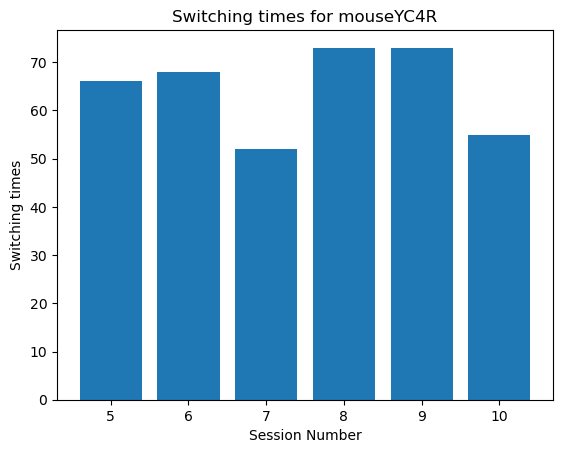

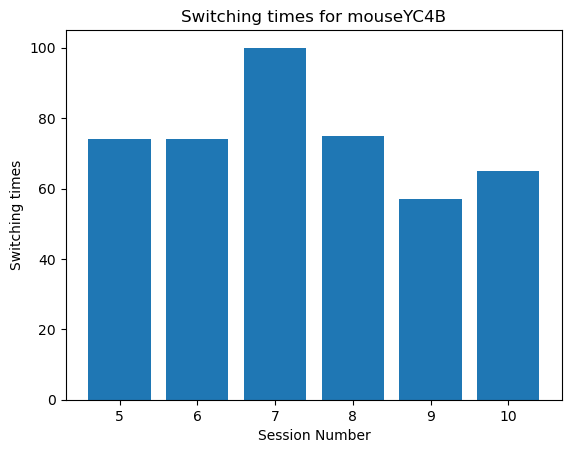

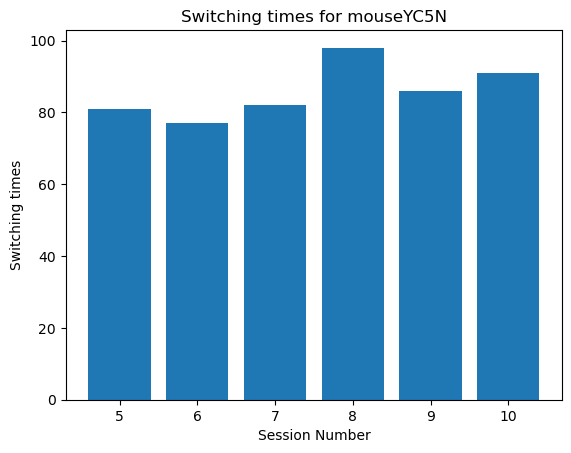

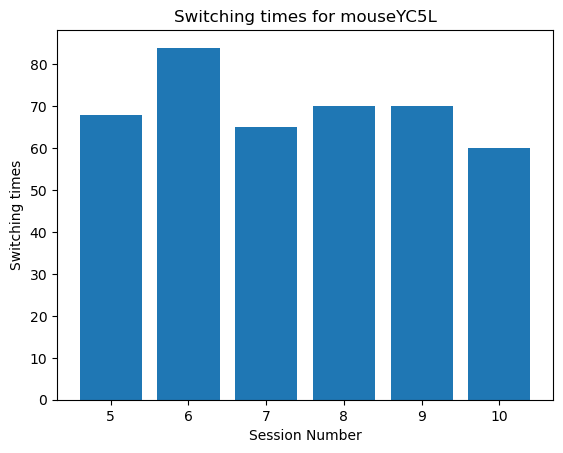

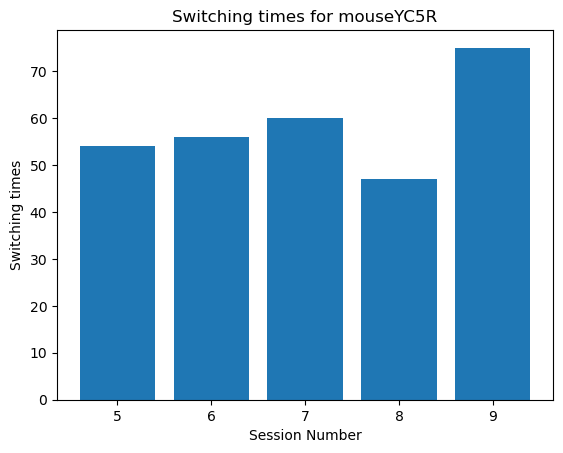

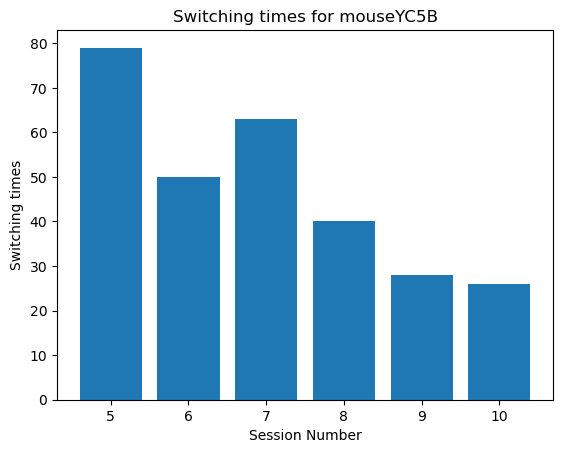

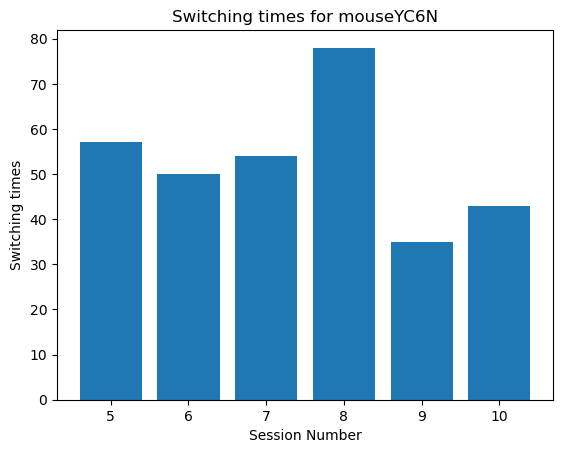

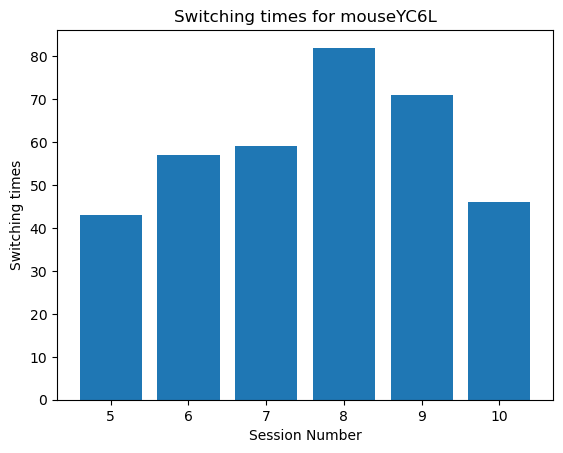

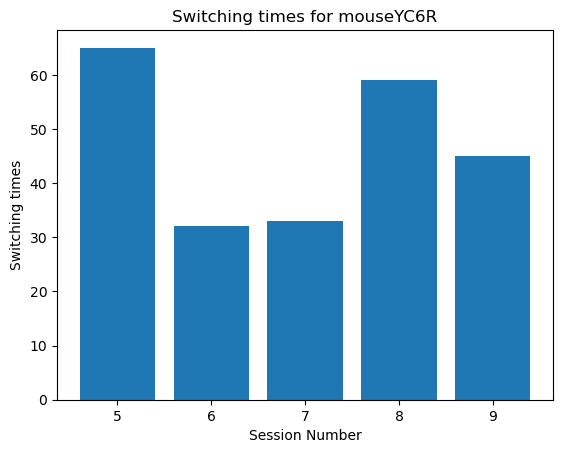

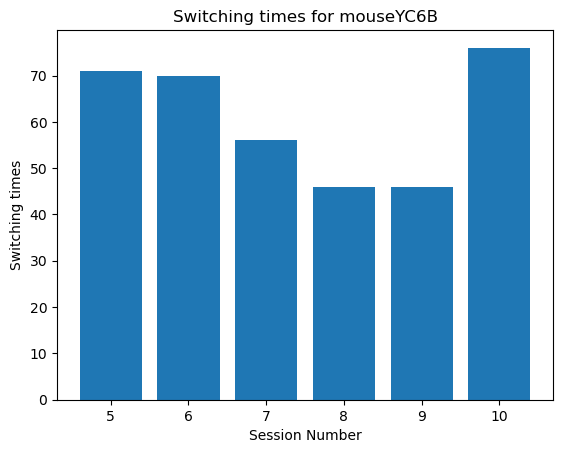

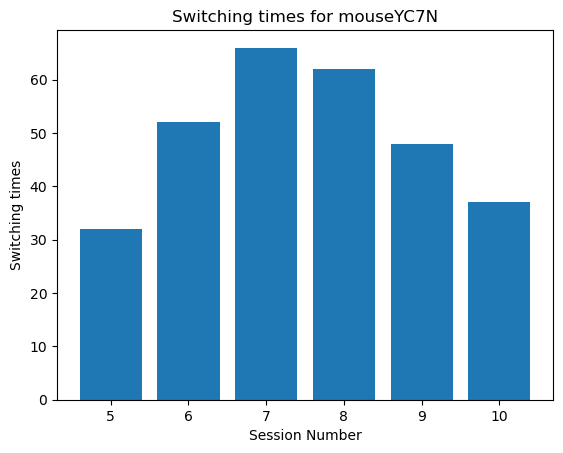

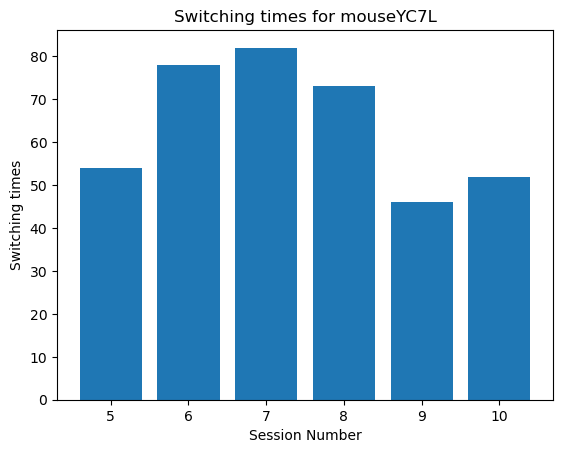

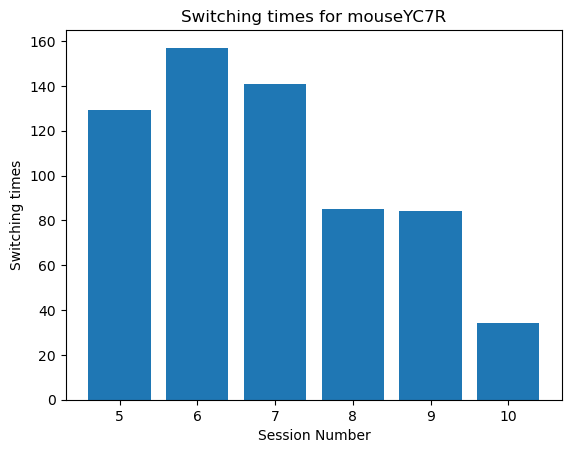

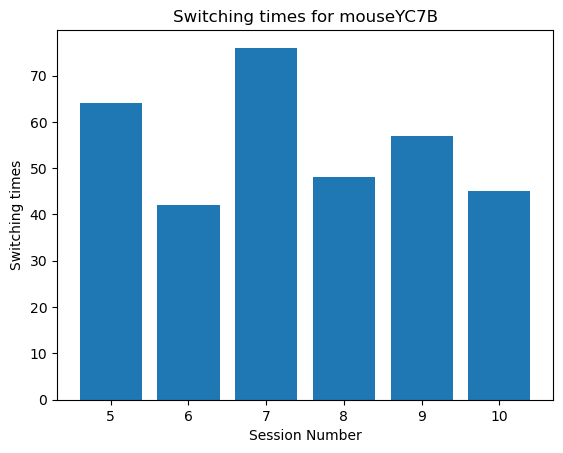

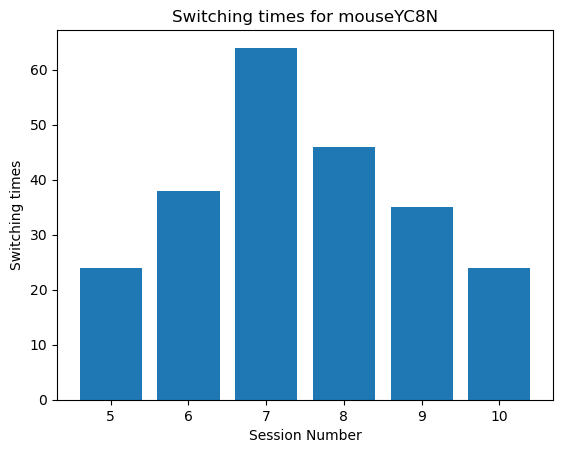

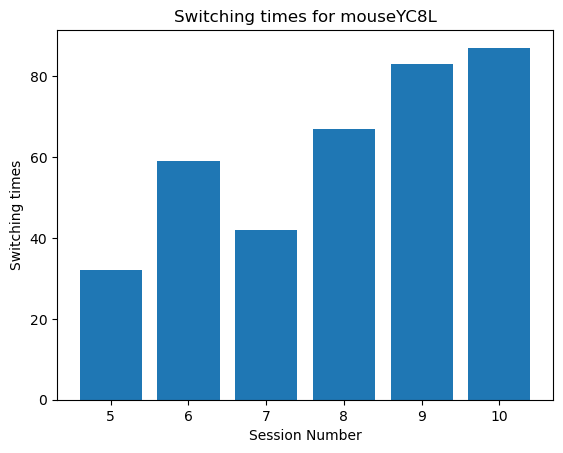

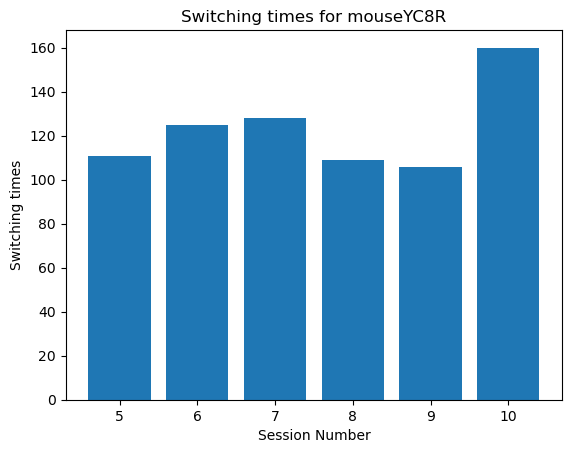

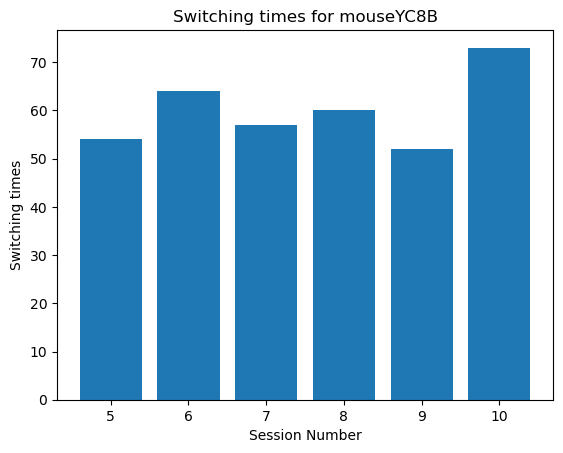

In [ ]:
#Visualization of switching behavior

for mouse in switching_by_mouse_and_session:
    session = list(switching_by_mouse_and_session[mouse].keys())
    switching = list(switching_by_mouse_and_session[mouse].values())
    plt.figure()
    plt.bar(switching, session)
    plt.ylabel('Session Number')
    plt.xlabel('Switching times')
    plt.title(f"Switching times for mouse{mouse}")
    plt.show



<function matplotlib.pyplot.show(close=None, block=None)>

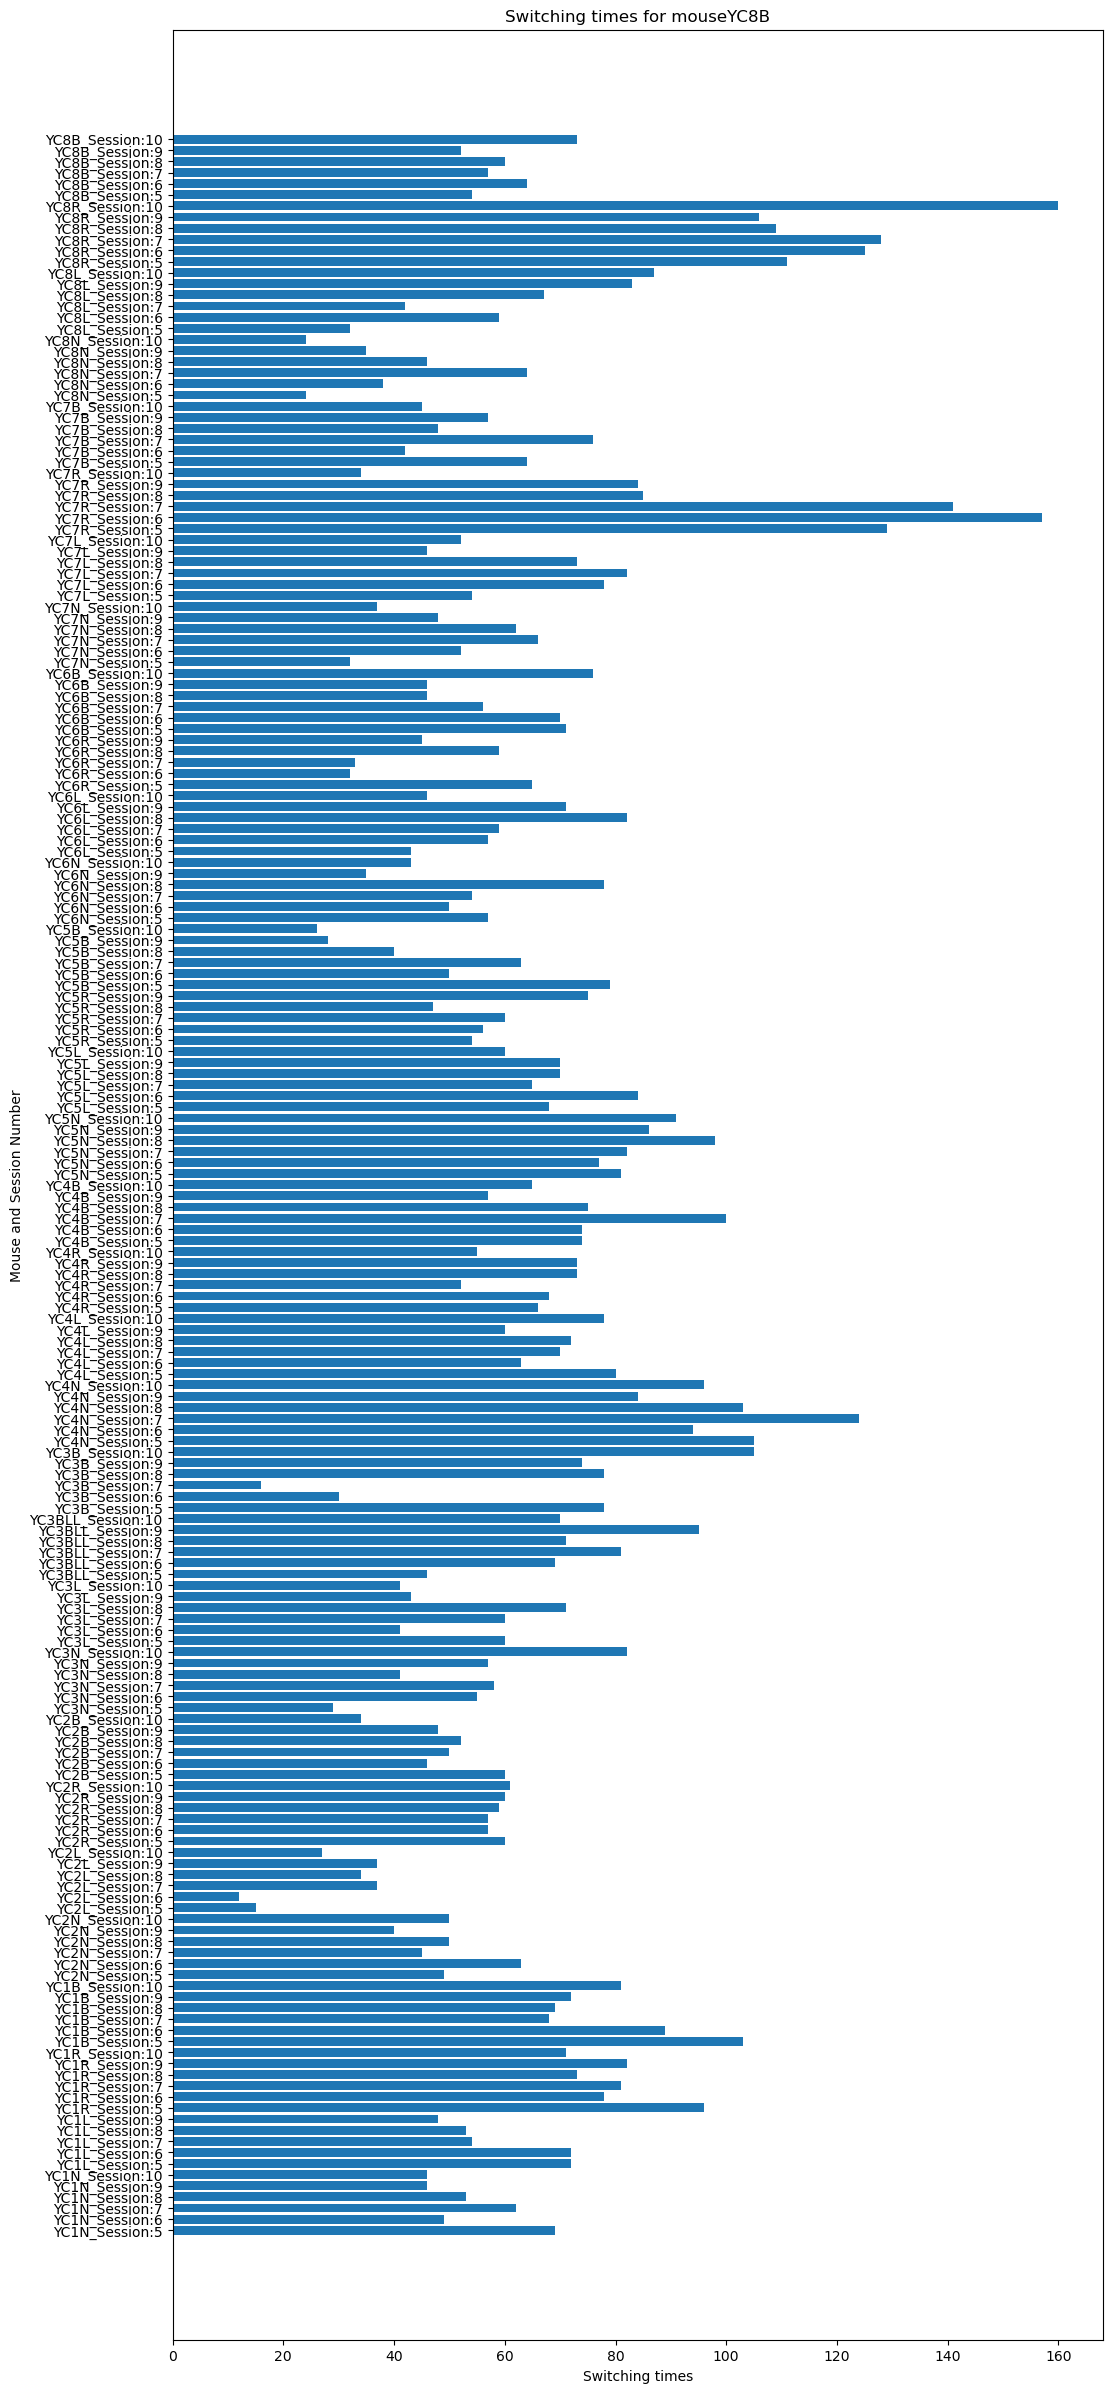

In [76]:
#Visualization of switching by sessions and mouse on the same plot
switching_plt = []
mouse_session_plt = []



for mouse in switching_by_mouse_and_session:
    for session in switching_by_mouse_and_session[mouse]:
        switching_plt.append(switching_by_mouse_and_session[mouse][session])
        mouse_session_plt.append(f"{mouse}_Session:{session}")


plt.figure(figsize=(12,30))
plt.barh(mouse_session_plt,switching_plt)
plt.ylabel('Mouse and Session Number')
plt.xlabel('Switching times')
plt.title(f"Switching times for mouse{mouse}")
plt.show


In [118]:
#Age Distribution
print(df.Age_Groups.unique())
print(df.columns.unique())
print(df.Current_age.unique())

[0 2]
Index(['Mouse', 'Age_Groups', 'Trial', 'blockTrial', '0_ITI',
       '0_trialDuration', 'Decision', '1_Port', '1_Reward', '1_ITI',
       '1_trialDuration', '2_Port', '2_Reward', '2_ITI', '2_trialDuration',
       '3_Port', '3_Reward', '3_ITI', '3_trialDuration', 'highPort', 'Reward',
       'Mouse ID', 'Session ID', 'Condition', 'Switch', 'laser_stim', 'Target',
       'Block ID', 'blockLength', 'session_pos', 'retrain', 'DOB', 'Sex',
       'Start_Age', 'Cohort_Name', 'Trial_based', 'Fibers',
       'Dreadds_During_Training', 'Viral_expression', 'Genotype',
       'Date_of_Surgery', 'Date', 'Current_age', 'Session_Number',
       'block_pos_rev'],
      dtype='object')
[ 49  50  51  52  53  56  57  46 109 112 113 114 115 116 106 107 108 105
 102 119  45  44]


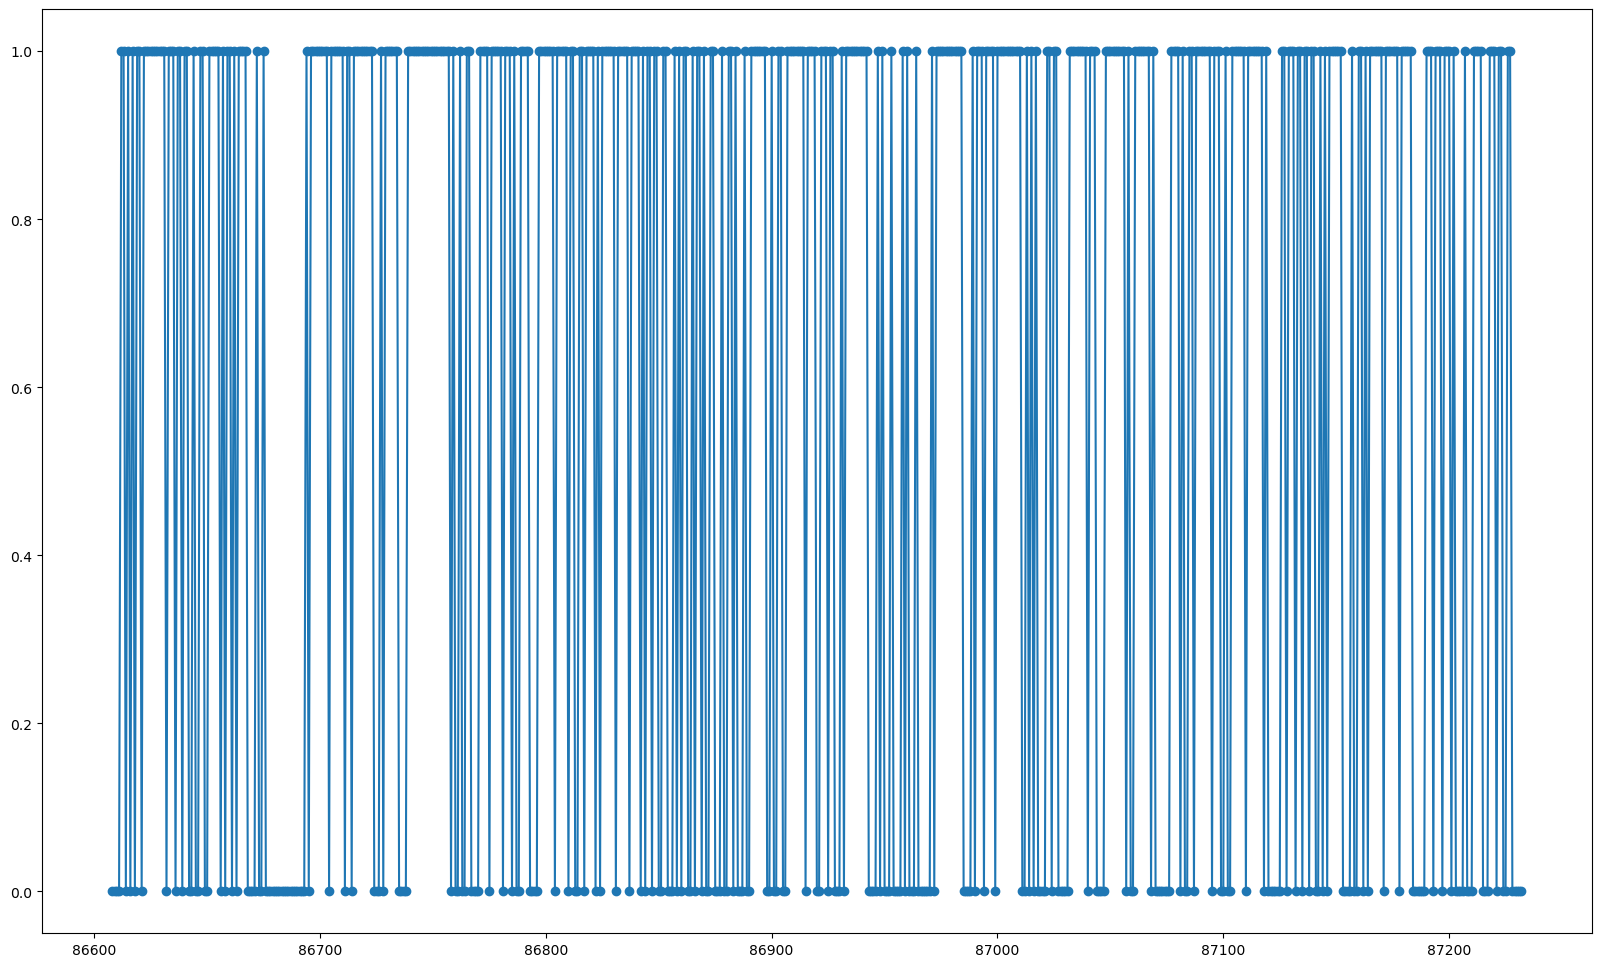

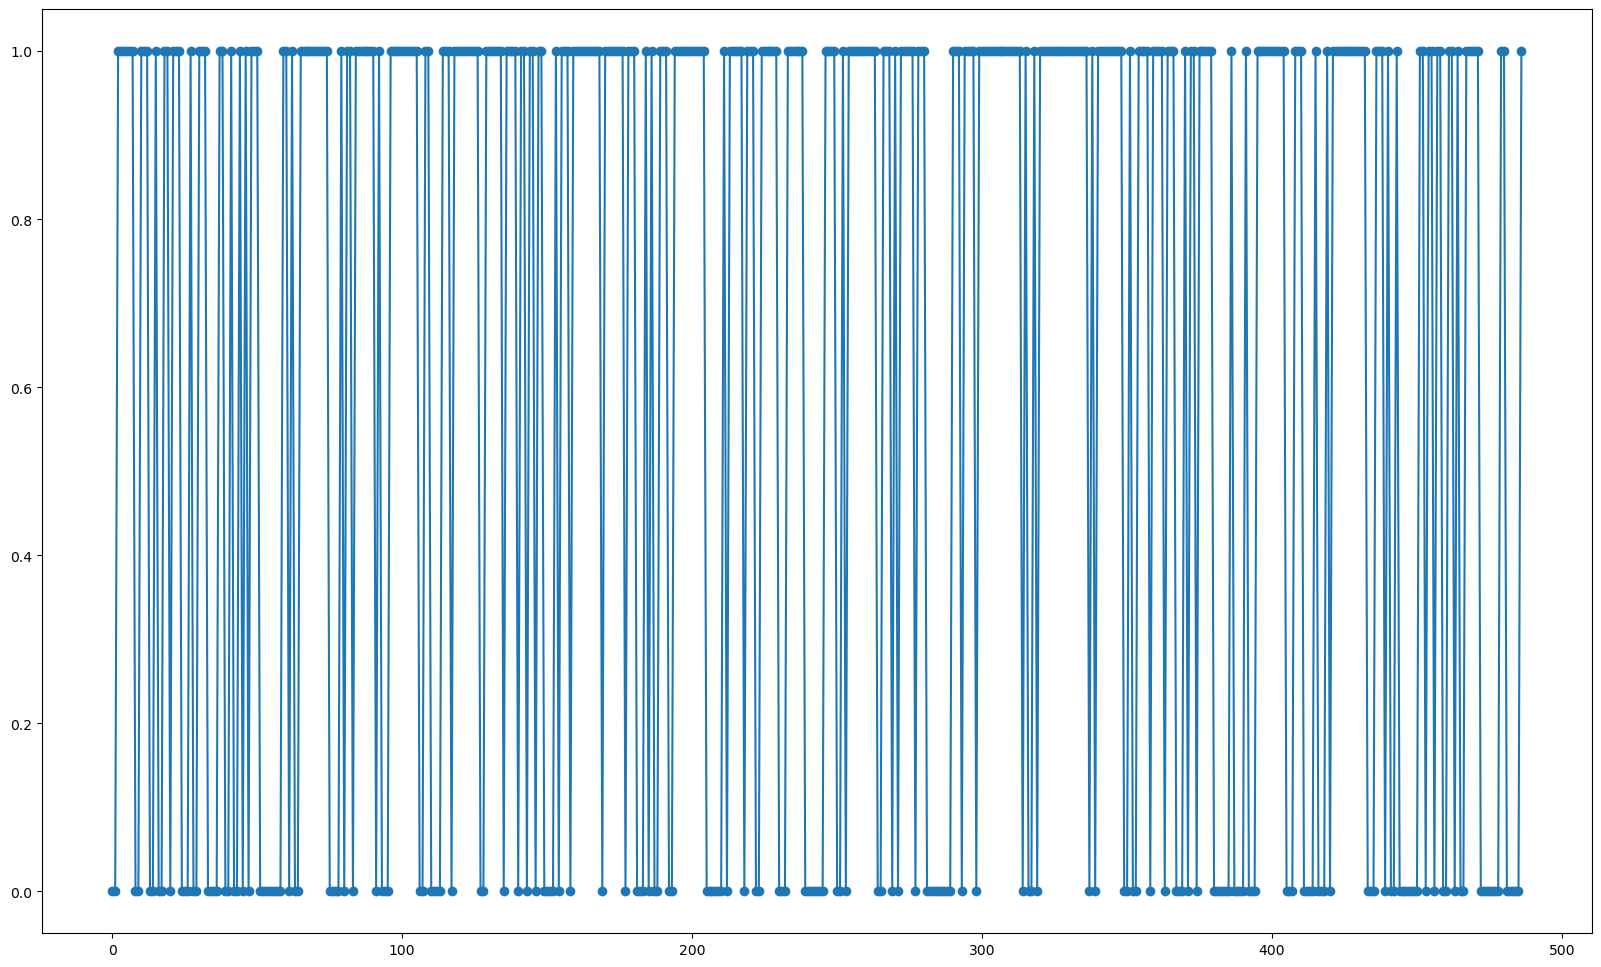

In [80]:
#Extract Reward data for YC8R Session 10 (with extremely high switching times)

reward_data_YC8R_10 = data_by_mouse_and_session['YC8R'][10].Reward

plt.figure(figsize = (20,12))
plt.plot(reward_data_YC8R_10, marker = "o")

#Comparison with YC1N

reward_data_YC1N_5 = data_by_mouse_and_session['YC1N'][5].Reward

plt.figure(figsize = (20,12))
plt.plot(reward_data_YC1N_5, marker = "o")

Mouse: YC1N, Session: 5, pct_adhere: 0.69
Mouse: YC1N, Session: 6, pct_adhere: 0.67
Mouse: YC1N, Session: 7, pct_adhere: 0.63
Mouse: YC1N, Session: 8, pct_adhere: 0.69
Mouse: YC1N, Session: 9, pct_adhere: 0.64
Mouse: YC1N, Session: 10, pct_adhere: 0.61
Mouse: YC1L, Session: 5, pct_adhere: 0.73
Mouse: YC1L, Session: 6, pct_adhere: 0.74
Mouse: YC1L, Session: 7, pct_adhere: 0.67
Mouse: YC1L, Session: 8, pct_adhere: 0.74
Mouse: YC1L, Session: 9, pct_adhere: 0.62
Mouse: YC1R, Session: 5, pct_adhere: 0.62
Mouse: YC1R, Session: 6, pct_adhere: 0.73
Mouse: YC1R, Session: 7, pct_adhere: 0.68
Mouse: YC1R, Session: 8, pct_adhere: 0.62
Mouse: YC1R, Session: 9, pct_adhere: 0.66
Mouse: YC1R, Session: 10, pct_adhere: 0.62
Mouse: YC1B, Session: 5, pct_adhere: 0.65
Mouse: YC1B, Session: 6, pct_adhere: 0.64
Mouse: YC1B, Session: 7, pct_adhere: 0.64
Mouse: YC1B, Session: 8, pct_adhere: 0.68
Mouse: YC1B, Session: 9, pct_adhere: 0.72
Mouse: YC1B, Session: 10, pct_adhere: 0.69
Mouse: YC2N, Session: 5, pct_ad

<function matplotlib.pyplot.show(close=None, block=None)>

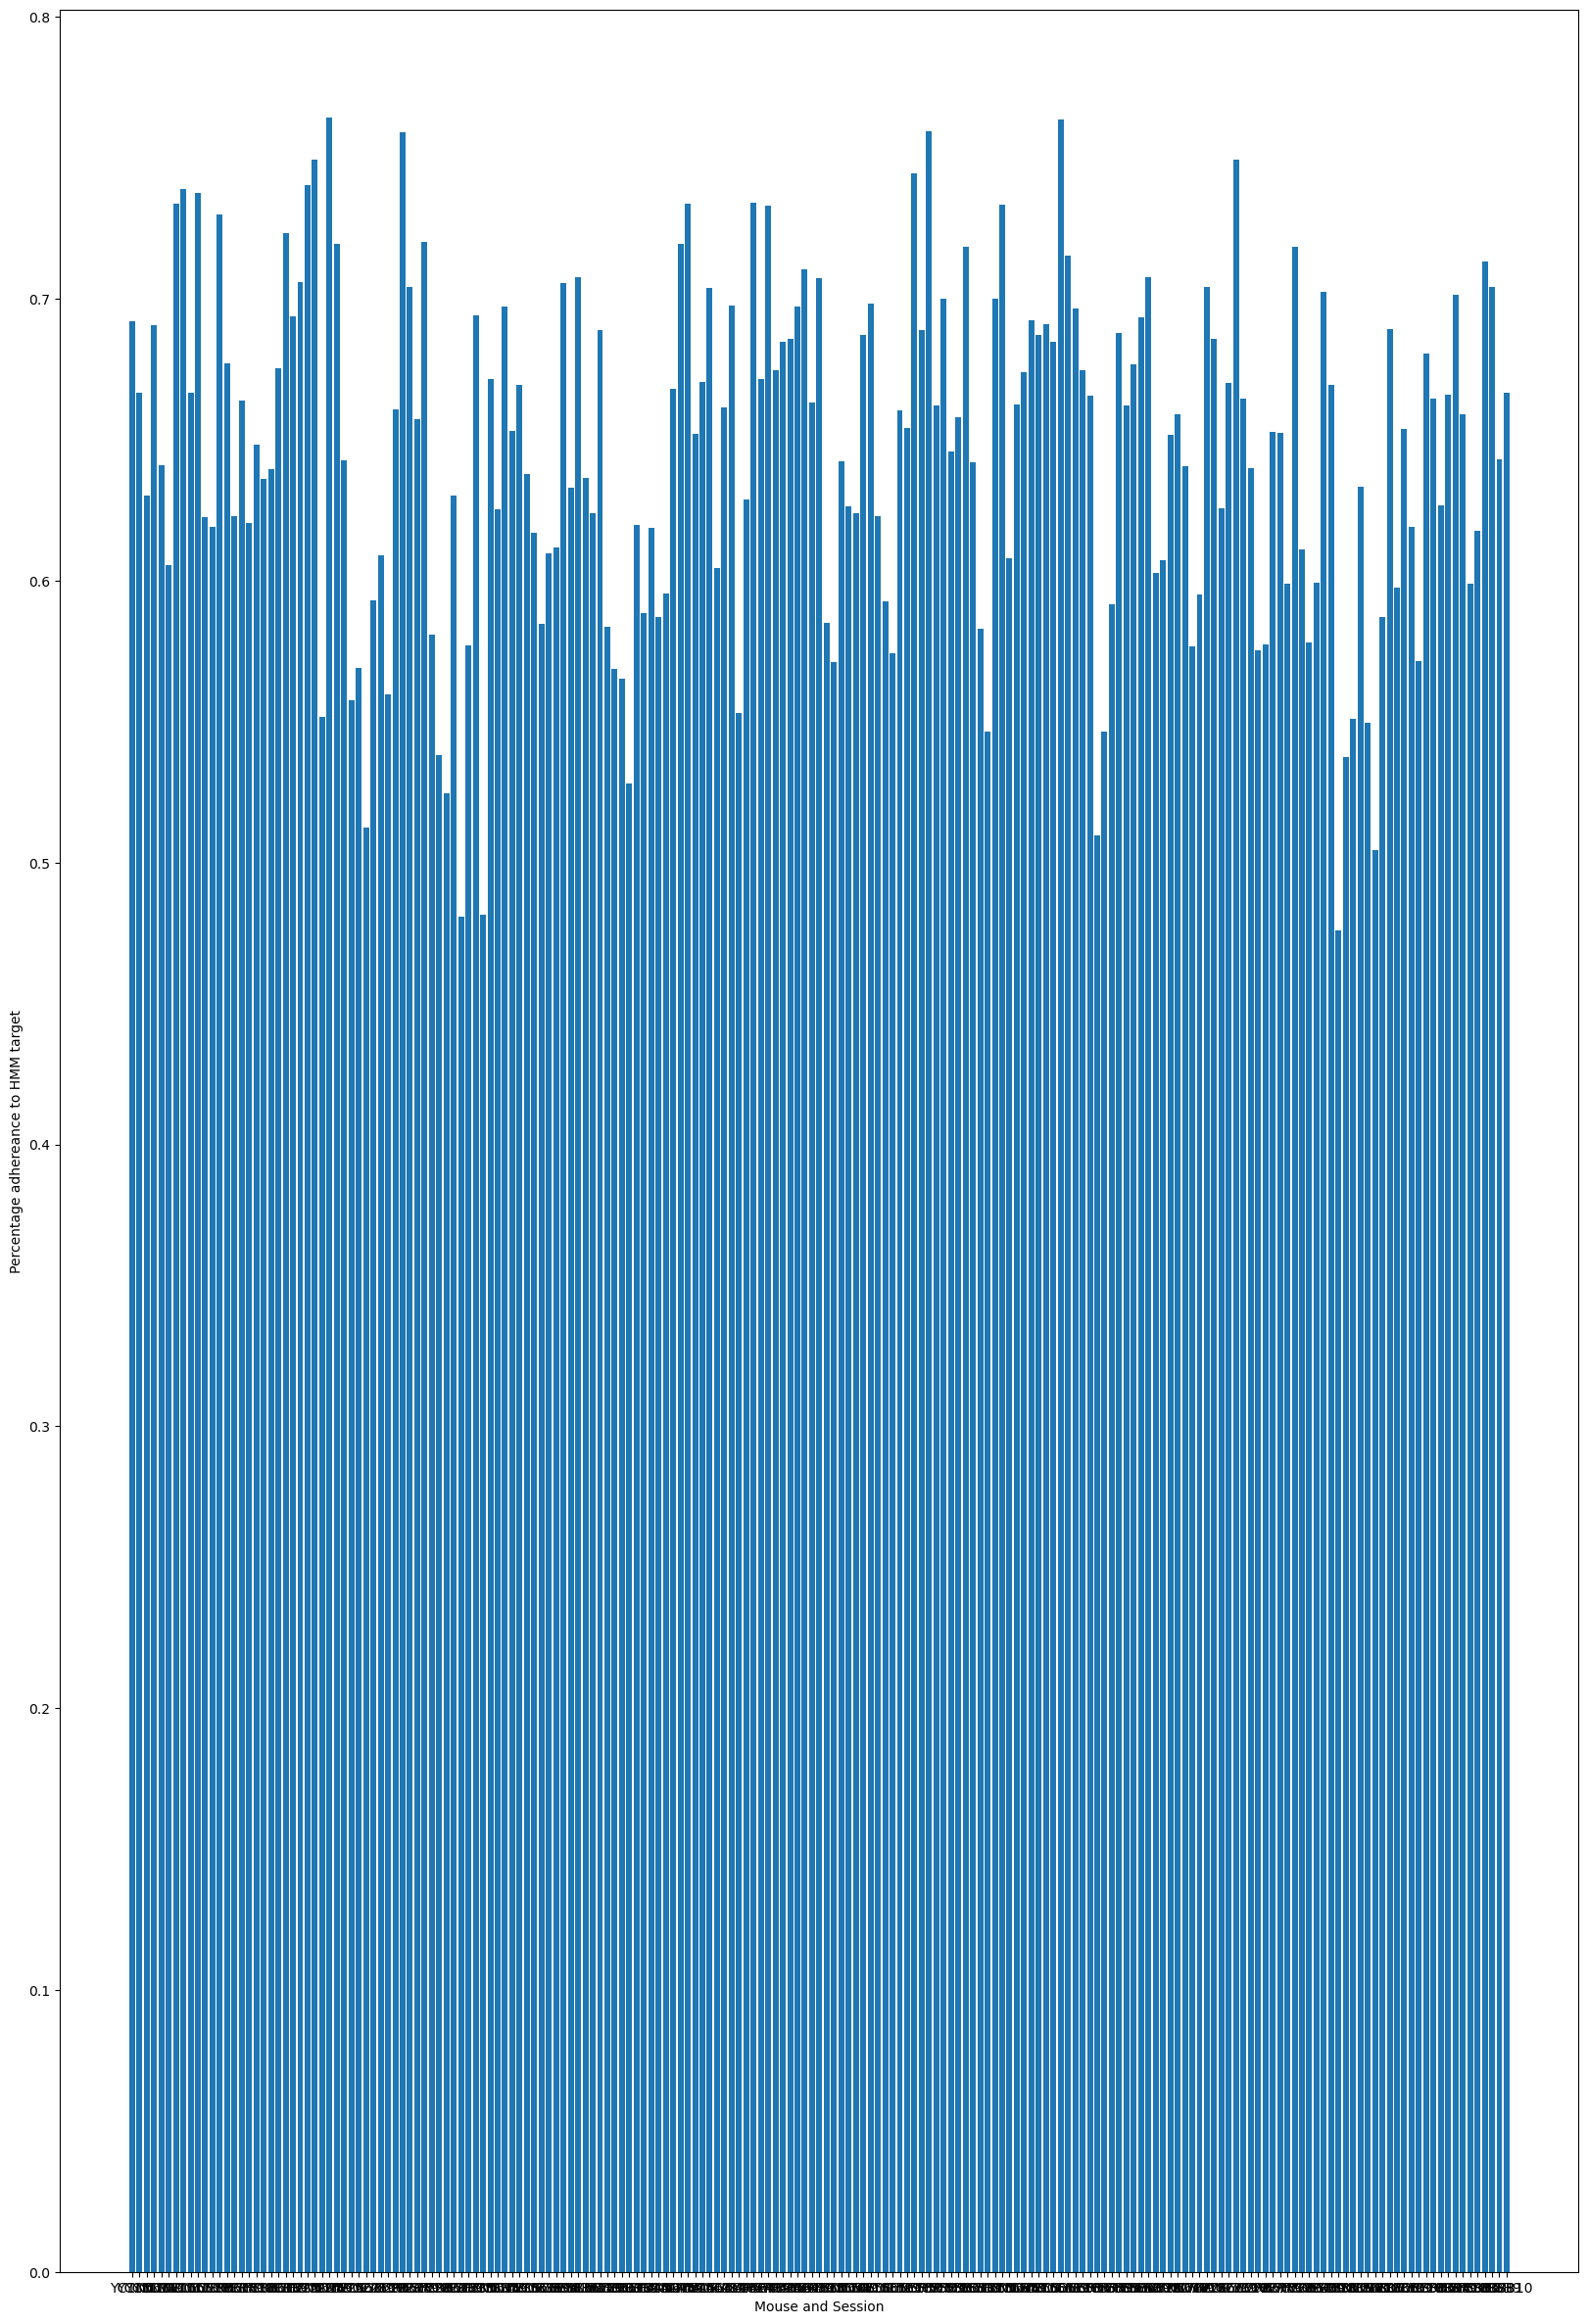

In [ ]:
#How well the mouse adheres to the HMM predicted target by mouse and session
pct_adhere = {}
for mouse in data_by_mouse_and_session.keys():
    pct_adhere[mouse] ={}
    for session in data_by_mouse_and_session[mouse].keys():
        adhere = []
        for trial in range (1, len(data_by_mouse_and_session[mouse][session])):
            if data_by_mouse_and_session[mouse][session]["Decision"].iloc[trial] == data_by_mouse_and_session[mouse][session]['Target'].iloc[trial]:
                adhere.append(1)
        pct_adhere[mouse][session] = len(adhere)/len(data_by_mouse_and_session[mouse][session].Decision)


#print(pct_adhere[mouse][session])
plt_pct_adhere =[]
plt_mouse_session = []
for mouse in pct_adhere:
    for session in pct_adhere[mouse]:
        plt_pct_adhere.append(pct_adhere[mouse][session])
        plt_mouse_session.append(mouse + str(session))
        print(f"Mouse: {mouse}, Session: {session}, pct_adhere: {pct_adhere[mouse][session]:.2f}")


plt.figure(figsize=(20,30))
plt.bar(plt_mouse_session,plt_pct_adhere)
plt.xlabel('Mouse and Session')
plt.ylabel('Percentage adhereance to HMM target')

plt.show




In [ ]:
#using pandas grouping method
#producing a session report for each mouse/session
    #sex
    #age
    #how well win stay lose switch
    #bias on directionality

#play with .diff and .sum .shift

#trial duration and ITI. (Hypothesis: Win Stay should take less time then Lose Switch)